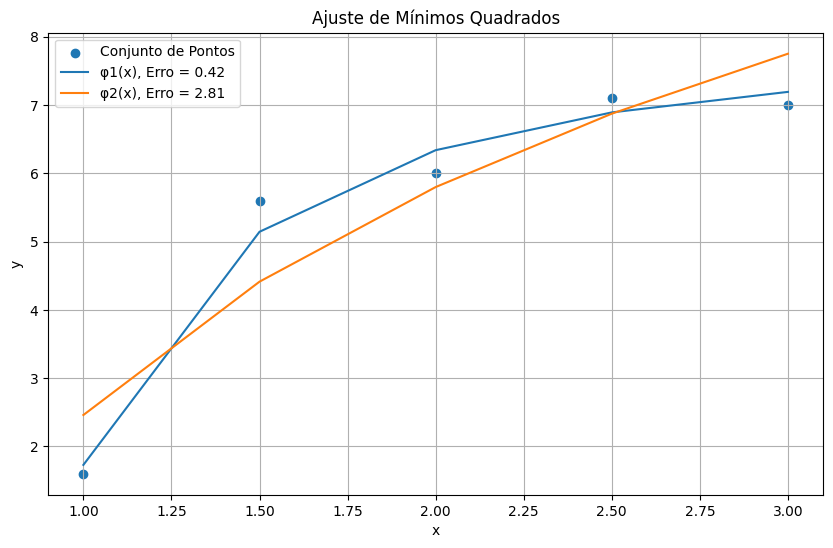

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados
x = np.array([1, 1.5, 2, 2.5, 3])
y = np.array([1.6, 5.6, 6, 7.1, 7])

# Função de ajuste φ1(x) = α1 + α2 * (1/x^2)
def phi_1(x, alpha_1, alpha_2):
    return alpha_1 + alpha_2 * (1 / x ** 2)

# Função de ajuste φ2(x) = α1 + α2 * ln(x)
def phi_2(x, alpha_1, alpha_2):
    return alpha_1 + alpha_2 * np.log(x)

# Método dos mínimos quadrados para ajuste de parâmetros
def least_squares_fit(func, x, y):
    def error(params):
        return np.sum((func(x, *params) - y) ** 2)

    from scipy.optimize import minimize
    params_init = [1.0, 1.0]  # Valores iniciais dos parâmetros
    result = minimize(error, params_init)
    return result.x

# Ajuste φ1(x)
alpha_1_phi1, alpha_2_phi1 = least_squares_fit(phi_1, x, y)

# Ajuste φ2(x)
alpha_1_phi2, alpha_2_phi2 = least_squares_fit(phi_2, x, y)

# Valores ajustados
y_fit_phi1 = phi_1(x, alpha_1_phi1, alpha_2_phi1)
y_fit_phi2 = phi_2(x, alpha_1_phi2, alpha_2_phi2)

# Cálculo do erro quadrático geral
error_phi1 = np.sum((y_fit_phi1 - y) ** 2)
error_phi2 = np.sum((y_fit_phi2 - y) ** 2)

# Plotagem
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Conjunto de Pontos')
plt.plot(x, y_fit_phi1, label=f'φ1(x), Erro = {error_phi1:.2f}')
plt.plot(x, y_fit_phi2, label=f'φ2(x), Erro = {error_phi2:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Mínimos Quadrados')
plt.legend()
plt.grid(True)
plt.show()
